<a href="https://colab.research.google.com/github/MariaAbb7/ProgramesCursPython_B2/blob/main/ProjecteContaminantsBCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Es carreguen les llibreries

Aquest programa té per objectiu estudiar els contaminants atmosfèrics a la ciutats de Barcelona.
Per això es fan servir les dades recollides durant un mes a la xarxa de qualitat de l'aire. Aquest codi s'ha fet amb les dades recollides al mes d'octubre, es podrian haver agafat unes altres (2023_10_Aire_BCN.csv).

El codi permet seleccionar el contaminant que es vol estudiar, per després analitzar com varien les concentracions segons l'estació on s'hagin recollit les dades.
Els identificadors del contaminants i les estacions, són els següents:

id-Estació
4: Poblenou
42:Sants
43:Eixample
44:Gracia
50:Ciutadella
54:Vall Hebron
57:Palau Reial
58:Observatori Fabra

Id Contaminants
1:SO2 [µg/m³]
6:CO
7:NO
8:NO2
9:PM2.5
10:PM10
12:NOx
14:O3
22:Black carbon



S'importen les llibreries que es necessiten:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Es carrega el fitxer de dades i es mostren les primeres files

In [3]:
df = pd.read_csv('2023_10_Aire_BCN.csv')  #dades del mes d'octubre
df.head()

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2023,10,1,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,8,Barcelona,19,Barcelona,4,7,2023,10,2,4.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
2,8,Barcelona,19,Barcelona,4,7,2023,10,3,10.0,...,1.0,V,2.0,V,1.0,V,1.0,V,1.0,V
3,8,Barcelona,19,Barcelona,4,7,2023,10,4,7.0,...,1.0,V,2.0,V,1.0,V,1.0,V,1.0,V
4,8,Barcelona,19,Barcelona,4,7,2023,10,5,1.0,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODI_PROVINCIA    2015 non-null   int64  
 1   PROVINCIA         2015 non-null   object 
 2   CODI_MUNICIPI     2015 non-null   int64  
 3   MUNICIPI          2015 non-null   object 
 4   ESTACIO           2015 non-null   int64  
 5   CODI_CONTAMINANT  2015 non-null   int64  
 6   ANY               2015 non-null   int64  
 7   MES               2015 non-null   int64  
 8   DIA               2015 non-null   int64  
 9   H01               1908 non-null   float64
 10  V01               2015 non-null   object 
 11  H02               1955 non-null   float64
 12  V02               2015 non-null   object 
 13  H03               1912 non-null   float64
 14  V03               2015 non-null   object 
 15  H04               1976 non-null   float64
 16  V04               2015 non-null   object 


In [5]:
df.isna().sum()

CODI_PROVINCIA        0
PROVINCIA             0
CODI_MUNICIPI         0
MUNICIPI              0
ESTACIO               0
CODI_CONTAMINANT      0
ANY                   0
MES                   0
DIA                   0
H01                 107
V01                   0
H02                  60
V02                   0
H03                 103
V03                   0
H04                  39
V04                   0
H05                  38
V05                   0
H06                  38
V06                   0
H07                  38
V07                   0
H08                  38
V08                   0
H09                  36
V09                   0
H10                 102
V10                   0
H11                 119
V11                   0
H12                 119
V12                   0
H13                 100
V13                   0
H14                  64
V14                   0
H15                  28
V15                   0
H16                  27
V16                   0
H17             

Es seleccionen les columnes referents al dia, estació i contaminant. Es guarda amb el nom df_1

In [6]:
df_1=df[["DIA","ESTACIO","CODI_CONTAMINANT"]]
df_1

,DIA,ESTACIO,CODI_CONTAMINANT
0,1,4,7
1,2,4,7
2,3,4,7
3,4,4,7
4,5,4,7
...,...,...,...
2010,27,58,14
2011,28,58,14
2012,29,58,14
2013,30,58,14


Els valors de les mesures de cada hora es guarden en df_H

In [7]:
df_H = df.select_dtypes(include=[float])
df_H.isna().sum()
df_H.head()


,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,11.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,10.0,1.0,1.0,1.0,1.0,1.0,4.0,18.0,43.0,45.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0
3,7.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,14.0,16.0,...,3.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,4.0,23.0,33.0,26.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


In [8]:
#calculem l'estadística abans d'interpolar, per comparar amb el valors finals
df_H.describe()

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,1908.000000,1955.000000,1912.000000,1976.000000,1977.000000,1977.000000,1977.000000,1977.000000,1979.000000,1913.000000,...,1987.000000,1988.000000,1988.000000,1988.000000,1987.000000,1987.000000,1983.000000,1987.000000,1987.000000,1987.000000
mean,328.189486,358.636394,352.153964,350.934919,348.429585,351.743824,365.696272,387.277436,391.714507,378.918468,...,356.412506,356.051559,355.927082,355.796308,356.967388,358.027781,355.653308,361.345979,359.809708,357.704378
std,1049.296877,1105.429907,1098.197745,1098.040214,1094.224180,1095.227687,1111.030933,1152.041722,1150.972718,1121.951267,...,1092.189898,1091.640721,1090.940294,1090.366611,1092.881936,1092.147155,1087.269364,1096.615069,1095.399365,1094.601567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680000,1.530000,1.445000,1.407500,1.360000,1.800000,2.000000,2.000000,2.450000,3.000000,...,2.125000,2.047500,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,12.000000,11.000000,10.000000,10.000000,10.000000,9.100000,10.300000,13.600000,17.000000,16.800000,...,11.000000,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000
75%,34.000000,33.000000,30.000000,30.000000,29.000000,28.000000,30.000000,40.000000,47.000000,48.000000,...,41.000000,39.000000,40.250000,41.000000,40.000000,38.000000,36.000000,36.000000,36.000000,36.000000
max,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,7400.000000,6424.000000,5664.000000,...,5002.400000,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000


Els valors buits, s'omplen interpolant les dades.

In [9]:
df_H.interpolate(method='linear', limit_direction='forward', axis=0,inplace=True)
df_H.isna().sum() #verifiquem nuls
df_H.describe() #calculem valors estadistics nous

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,354.362447,348.292089,346.472898,345.250973,342.594511,345.805801,359.344434,380.628404,385.354496,379.279134,...,351.648141,351.446221,351.344660,351.214896,352.196918,353.238179,355.754400,356.526638,354.996948,352.911563
std,1088.959613,1090.442596,1088.832875,1088.500988,1084.889856,1085.874083,1101.536829,1142.251137,1141.674103,1119.531051,...,1085.316333,1085.021361,1084.318759,1083.748587,1086.003921,1085.280861,1087.396482,1089.723439,1088.514719,1087.716844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.825000,1.665000,1.480000,1.420000,1.430000,1.780000,2.000000,2.000000,3.000000,3.000000,...,2.115000,2.040000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,12.000000,10.210000,10.000000,10.000000,10.000000,9.240000,10.600000,13.550000,17.000000,17.000000,...,11.000000,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000
75%,35.000000,32.000000,29.450000,29.500000,28.000000,28.000000,30.000000,39.290000,46.000000,48.000000,...,39.500000,38.000000,39.500000,39.000000,39.000000,37.000000,35.800000,36.000000,35.000000,35.535000
max,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,7400.000000,6424.000000,5664.000000,...,5002.400000,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000


Es calcula la mitjana diaria de cada fila

In [10]:
df_H["Mitjana_diaria"]=np.mean(df_H,axis=1)
df_H.head()

,H01,H02,H03,H04,H05,H06,H07,H08,H09,H10,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.208333
1,4.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,11.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.625000
2,10.0,1.0,1.0,1.0,1.0,1.0,4.0,18.0,43.0,45.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,7.500000
3,7.0,1.0,1.0,1.0,1.0,1.0,1.0,17.0,14.0,16.0,...,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,4.500000
4,1.0,1.0,1.0,1.0,1.0,1.0,4.0,23.0,33.0,26.0,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,7.208333


S'uneixen les dues dades df_1 (dia,contaminant i estació) amb les dades i la mitjana

In [11]:
df_3 = pd.concat([df_1, df_H], axis=1)
df_3.describe()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,16.000000,47.892308,170.569231,354.362447,348.292089,346.472898,345.250973,342.594511,345.805801,359.344434,...,351.446221,351.344660,351.214896,352.196918,353.238179,355.754400,356.526638,354.996948,352.911563,357.286432
std,8.946492,12.754181,346.309480,1088.959613,1090.442596,1088.832875,1088.500988,1084.889856,1085.874083,1101.536829,...,1085.021361,1084.318759,1083.748587,1086.003921,1085.280861,1087.396482,1089.723439,1088.514719,1087.716844,1088.610563
min,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,43.000000,8.000000,1.825000,1.665000,1.480000,1.420000,1.430000,1.780000,2.000000,...,2.040000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.666667
50%,16.000000,54.000000,12.000000,12.000000,10.210000,10.000000,10.000000,10.000000,9.240000,10.600000,...,11.000000,11.000000,11.000000,12.000000,13.000000,14.000000,14.000000,14.000000,13.000000,15.250000
75%,24.000000,57.000000,106.000000,35.000000,32.000000,29.450000,29.500000,28.000000,28.000000,30.000000,...,38.000000,39.500000,39.000000,39.000000,37.000000,35.800000,36.000000,35.000000,35.535000,36.041667
max,31.000000,58.000000,999.000000,5002.500000,5002.500000,5002.300000,5002.400000,5002.400000,5002.300000,5002.300000,...,5002.000000,5001.500000,5001.100000,5001.100000,5002.200000,5002.400000,5002.500000,5002.500000,5002.500000,5001.862500


In [12]:
#podem estudiar 8 estacions i 22 contaminants
df_3.nunique()

DIA                   31
ESTACIO                8
CODI_CONTAMINANT      22
H01                  504
H02                  499
H03                  491
H04                  496
H05                  479
H06                  500
H07                  501
H08                  530
H09                  534
H10                  557
H11                  525
H12                  533
H13                  518
H14                  531
H15                  505
H16                  499
H17                  510
H18                  502
H19                  514
H20                  507
H21                  492
H22                  502
H23                  504
H24                  499
Mitjana_diaria      1367
dtype: int64

Seleccionem un contaminant per fer un primer estudi. El codi 8 correspon a NO2

In [13]:
#Seleccionen el contaminant 8 (NO2)
df_contaminant= df_3[df_3["CODI_CONTAMINANT"] == 8]
df_contaminant.head()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
31,1,4,8,42.0,46.0,27.0,30.0,26.0,23.0,22.0,...,7.0,3.0,6.0,6.0,6.0,5.0,4.0,5.0,10.0,15.250000
32,2,4,8,14.0,21.0,22.0,23.0,21.0,32.0,36.0,...,7.0,10.0,8.0,8.0,14.0,15.0,16.0,33.0,31.0,22.000000
33,3,4,8,33.0,23.0,25.0,26.0,21.0,20.0,27.0,...,9.0,8.0,7.0,9.0,10.0,9.0,9.0,8.0,5.0,19.541667
34,4,4,8,26.0,19.0,7.0,10.0,12.0,17.0,30.0,...,18.0,17.0,17.0,12.0,15.0,18.0,12.0,13.0,11.0,23.458333
35,5,4,8,17.0,32.0,19.0,19.0,19.0,21.0,30.0,...,9.0,11.0,23.0,35.0,33.0,21.0,15.0,16.0,17.0,22.125000


In [14]:
df_contaminant.describe()

,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,16.000000,44.000000,8.0,20.070565,18.080645,17.348790,16.766129,14.945565,15.050403,17.913306,...,14.764113,15.330645,16.754032,17.830645,20.411290,20.620968,20.947581,20.544355,20.514113,19.736920
std,8.962359,16.257792,0.0,13.961955,14.556442,13.369169,12.703298,11.165919,10.854735,12.168621,...,11.465218,11.466089,12.330797,12.192350,13.879185,12.310815,12.680250,12.643270,13.689841,9.460462
min,1.000000,4.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.458333
25%,8.000000,42.750000,8.0,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,8.000000,9.000000,11.000000,12.000000,11.000000,11.000000,10.000000,13.093750
50%,16.000000,47.000000,8.0,17.000000,15.000000,15.000000,14.000000,13.000000,12.166667,16.000000,...,11.000000,12.000000,13.000000,13.000000,16.000000,18.000000,19.000000,18.000000,18.000000,18.750000
75%,24.000000,54.750000,8.0,28.000000,27.000000,25.000000,24.000000,22.000000,22.000000,26.000000,...,19.000000,21.250000,23.000000,23.000000,27.000000,27.000000,28.000000,26.250000,27.125000,25.166667
max,31.000000,58.000000,8.0,63.000000,69.000000,69.000000,67.000000,61.000000,56.000000,63.000000,...,79.000000,70.000000,68.000000,66.000000,107.000000,68.000000,72.000000,63.000000,66.000000,49.583333


S'agrupen els valors per estacions i es representa la mitjana diaria

[Text(0.5, 1.0, ' Mitjana contaminant NO2 per estació')]

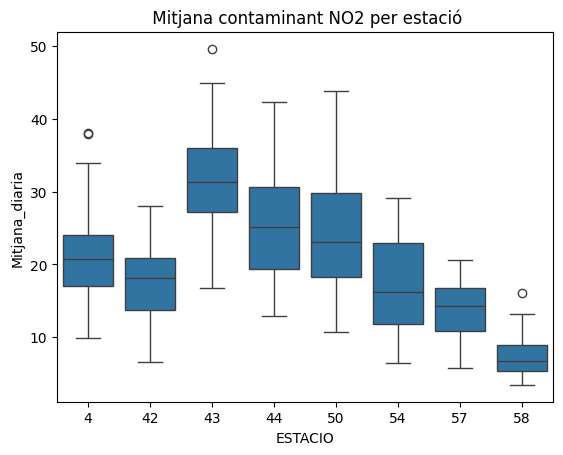

In [15]:
sns.boxplot(x='ESTACIO', y="Mitjana_diaria", data=df_contaminant).set (title = ' Mitjana contaminant NO2 per estació')



Seleccionem l'estació on s'han detectat més concentració de contaminant (la 43: la de l'Eixample) i on s'ha detectat menys (la 58: Observatori Fabra)

In [44]:
df_contaminantMax=df_contaminant[df_contaminant["ESTACIO"]==43]
df_contaminantMin=df_contaminant[df_contaminant["ESTACIO"]==58]


In [50]:
def EstudiEstacio(dades,nom):
  xpoints = dades["DIA"]
  ypoints = dades["Mitjana_diaria"]
  plt.plot(xpoints, ypoints)
  plt.xlabel("dia del mes")
  plt.ylabel("mesura del contaminant")
  plt.title("Variació del contaminant segons el dia del mes a l'estació de "+ nom )
  plt.show()
  fig = plt.figure()

  dades_festius = dades[dades["DIA"].isin([1,7,8,14,15,21,22,28,29])]
  dades_festius.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
  dades_festius.plot(kind="box")
  plt.xticks(rotation=90) #rotar els labels de l'eix x
  plt.title("Variació contaminant segons hora del dia durant els caps de setmana")

  dades_laborables = dades[~dades["DIA"].isin([1,7,8,14,15,21,22,28,29])]
  dades_laborables.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
  dades_laborables.plot(kind="box")
  plt.xticks(rotation=90) #rotar els labels de l'eix x
  plt.title("Variació contaminant segons hora del dia els dies laborables")


  return(dades.describe())


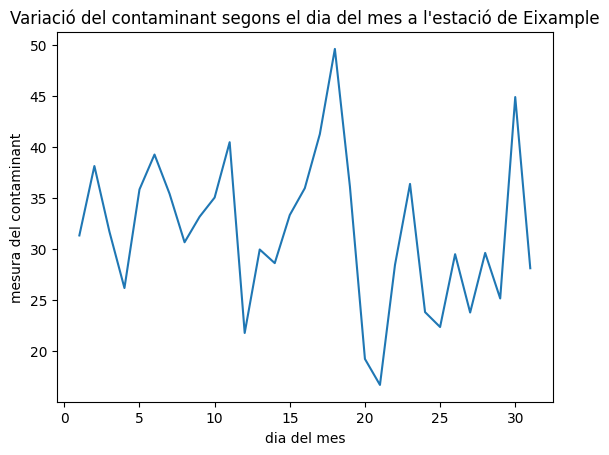

<ipython-input-50-ba06ff9bf4eb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_festius.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
<ipython-input-50-ba06ff9bf4eb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_laborables.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,43.0,8.0,29.516129,26.612903,26.032258,23.967742,20.870968,23.000000,31.193548,...,26.354839,29.741935,30.903226,32.483871,34.870968,34.806452,32.612903,30.032258,31.161290,31.674059
std,9.092121,0.0,0.0,15.594595,18.078860,17.777296,16.890794,14.352101,12.889272,15.111628,...,10.660045,11.767095,12.424049,12.829318,13.756797,11.976141,11.615155,11.332796,14.628959,7.471118
min,1.000000,43.0,8.0,9.000000,6.000000,6.000000,5.000000,4.000000,8.000000,12.000000,...,11.000000,12.000000,14.000000,14.000000,18.000000,17.000000,15.000000,14.000000,9.000000,16.708333
25%,8.500000,43.0,8.0,19.000000,13.000000,11.000000,10.000000,11.000000,12.500000,20.500000,...,17.500000,22.000000,23.000000,23.500000,24.500000,27.000000,24.500000,23.500000,21.500000,27.156250
50%,16.000000,43.0,8.0,25.000000,22.000000,23.000000,21.000000,16.000000,20.000000,27.000000,...,27.000000,27.000000,28.000000,28.000000,31.000000,32.000000,31.000000,27.000000,27.000000,31.333333
75%,23.500000,43.0,8.0,38.000000,35.000000,32.000000,30.000000,28.000000,28.000000,46.000000,...,33.500000,35.500000,35.500000,39.500000,39.000000,38.500000,37.000000,33.500000,37.000000,36.041667
max,31.000000,43.0,8.0,63.000000,68.000000,66.000000,62.000000,61.000000,56.000000,63.000000,...,50.000000,57.000000,61.000000,63.000000,86.000000,68.000000,63.000000,63.000000,66.000000,49.583333


<Figure size 640x480 with 0 Axes>

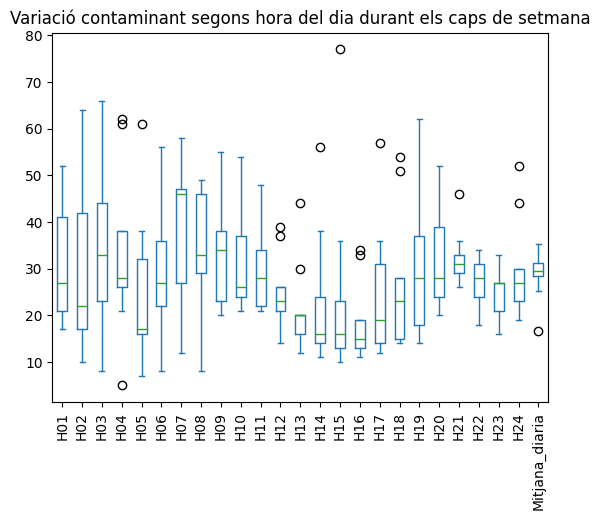

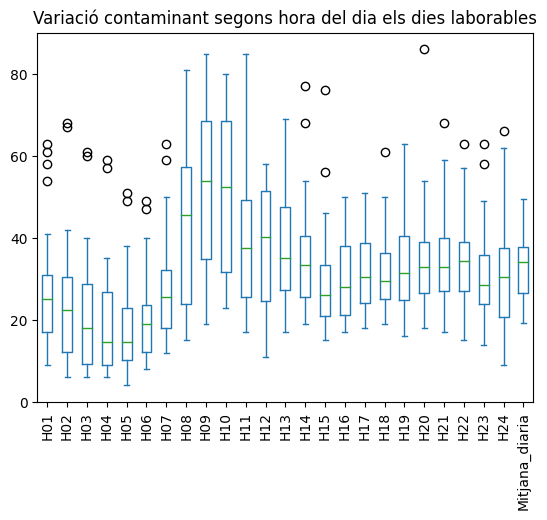

In [51]:
EstudiEstacio(df_contaminantMax,"Eixample")

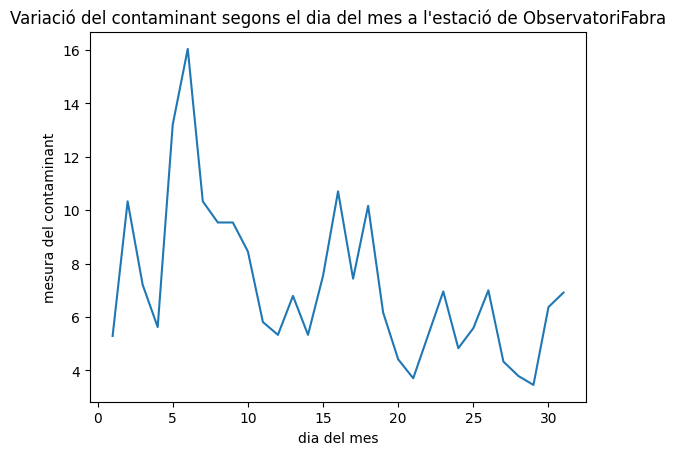

<ipython-input-50-ba06ff9bf4eb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_festius.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)
<ipython-input-50-ba06ff9bf4eb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dades_laborables.drop(['DIA',"ESTACIO","CODI_CONTAMINANT"], axis=1, inplace=True)


,DIA,ESTACIO,CODI_CONTAMINANT,H01,H02,H03,H04,H05,H06,H07,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Mitjana_diaria
count,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,58.0,8.0,6.419355,5.645161,5.935484,6.677419,5.483871,4.193548,3.967742,...,7.580645,7.419355,8.709677,8.548387,8.677419,7.548387,6.354839,6.387097,6.451613,7.212366
std,9.092121,0.0,0.0,5.340251,6.295757,6.439128,6.487871,4.280740,2.676059,2.701652,...,4.978448,4.667435,5.628461,5.130554,5.781506,4.972181,3.877700,3.343426,4.395746,2.888607
min,1.000000,58.0,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.458333
25%,8.500000,58.0,8.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.500000,4.500000,6.000000,4.500000,3.500000,4.500000,4.000000,5.333333
50%,16.000000,58.0,8.0,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,...,7.000000,6.000000,7.000000,8.000000,7.000000,7.000000,5.000000,6.000000,5.000000,6.791667
75%,23.500000,58.0,8.0,7.500000,5.500000,6.000000,6.500000,6.500000,5.000000,4.000000,...,10.000000,9.500000,12.500000,11.000000,10.500000,9.000000,9.000000,8.000000,8.000000,9.000000
max,31.000000,58.0,8.0,19.000000,33.000000,29.000000,28.000000,18.000000,12.000000,14.000000,...,24.000000,21.000000,26.000000,24.000000,26.000000,26.000000,14.000000,14.000000,21.000000,16.041667


<Figure size 640x480 with 0 Axes>

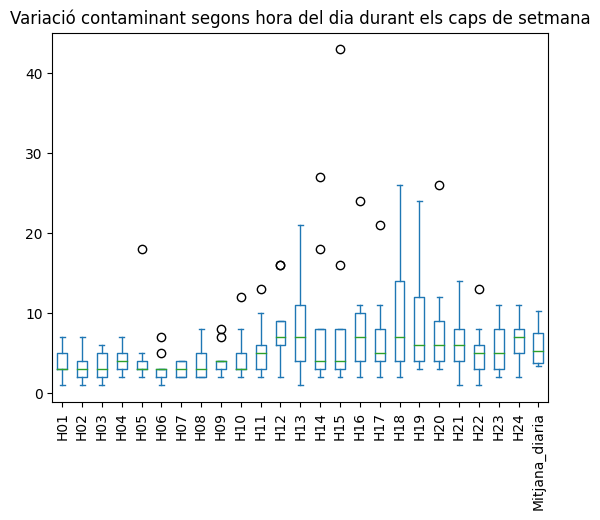

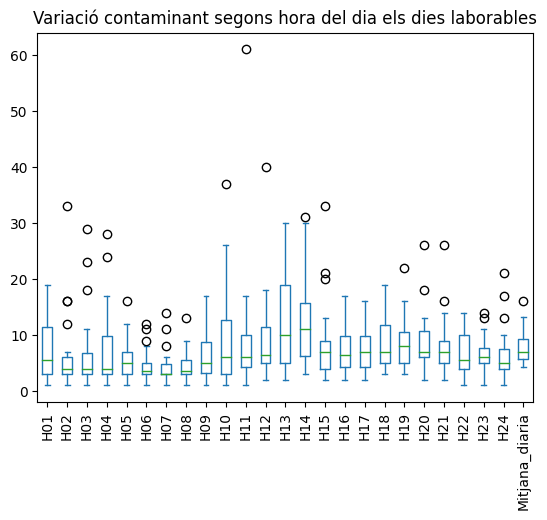

In [52]:
EstudiEstacio(df_contaminantMin,"ObservatoriFabra")